# Capstone Project - Skillship Foundation
> Dataset from Kaggle: https://www.kaggle.com/fabdelja/tictactoe

## Predicting whether a tic-tac-toe game is won/draw/lost on the basis of the moves
### Data pre-processing

Let's start with importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
df = pd.read_csv('datasets_64273_125984_Tic tac initial results.csv')
df.head()

,MOVE1,MOVE2,MOVE3,MOVE4,MOVE5,MOVE6,MOVE7,CLASS
0,0,8,1,3,?,?,?,loss
1,4,7,2,6,?,?,?,win
2,0,8,1,6,5,?,?,draw
3,4,7,2,3,?,?,?,draw
4,0,4,2,1,?,?,?,win


Checking the datatypes of the dataset

In [4]:
df.dtypes

MOVE1     int64
MOVE2    object
MOVE3    object
MOVE4    object
MOVE5    object
MOVE6    object
MOVE7    object
CLASS    object
dtype: object

Dropping the 'MOVE6' and 'MOVE7' columns as they are empty and will hold no effect on the output.

In [5]:
df = df.drop(['MOVE6'],axis=1)
df = df.drop(['MOVE7'],axis=1)
df.head()

,MOVE1,MOVE2,MOVE3,MOVE4,MOVE5,CLASS
0,0,8,1,3,?,loss
1,4,7,2,6,?,win
2,0,8,1,6,5,draw
3,4,7,2,3,?,draw
4,0,4,2,1,?,win


We will replace all the '?' with -1 to standardize our data

In [6]:
df['MOVE5'] = df['MOVE5'].replace({'?':-1})

In [7]:
df['MOVE4'] = df['MOVE4'].replace({'?':-1})

In [8]:
df['MOVE3'] = df['MOVE3'].replace({'?':-1})

In [9]:
df['MOVE2'] = df['MOVE2'].replace({'?':-1})

In [10]:
df

,MOVE1,MOVE2,MOVE3,MOVE4,MOVE5,CLASS
0,0,8,1,3,-1,loss
1,4,7,2,6,-1,win
2,0,8,1,6,5,draw
3,4,7,2,3,-1,draw
4,0,4,2,1,-1,win
...,...,...,...,...,...,...
2431,4,5,3,-1,-1,win
2432,6,2,8,0,-1,loss
2433,4,5,7,1,-1,win
2434,6,2,0,-1,-1,loss


### Encoding our CLASS

In [11]:
mapping={'loss':0,
         'draw':1,
         'win':2}
df['CLASS'] = df['CLASS'].apply(lambda x: mapping[x])

In [12]:
df

,MOVE1,MOVE2,MOVE3,MOVE4,MOVE5,CLASS
0,0,8,1,3,-1,0
1,4,7,2,6,-1,2
2,0,8,1,6,5,1
3,4,7,2,3,-1,1
4,0,4,2,1,-1,2
...,...,...,...,...,...,...
2431,4,5,3,-1,-1,2
2432,6,2,8,0,-1,0
2433,4,5,7,1,-1,2
2434,6,2,0,-1,-1,0


### Variable identification
X - Independent variable, Y - Dependent variable

In [13]:
X = df.drop('CLASS',axis=1).values
y = df['CLASS'].values

In [14]:
X = X.astype(int)

## Data visualization

In [39]:
import seaborn as sns
%matplotlib inline

In [40]:
df.CLASS.value_counts()

1    1134
2     651
0     651
Name: CLASS, dtype: int64

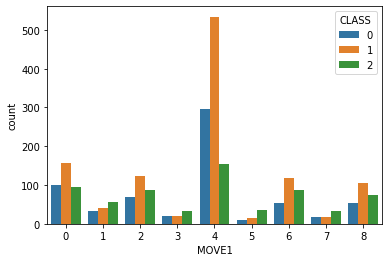

In [41]:
sns.countplot("MOVE1", hue="CLASS", data=df)
plt.show()

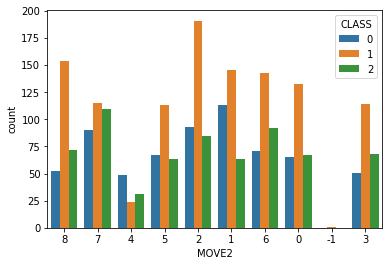

In [42]:
sns.countplot("MOVE2", hue="CLASS", data=df)
plt.show()

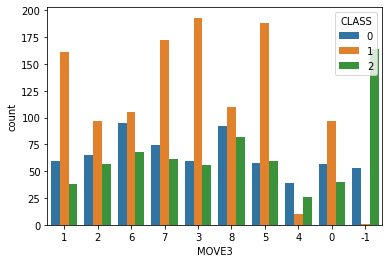

In [43]:
sns.countplot("MOVE3", hue="CLASS", data=df)
plt.show()

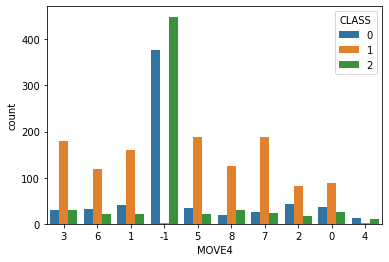

In [45]:
sns.countplot("MOVE4", hue="CLASS", data=df)
plt.show()

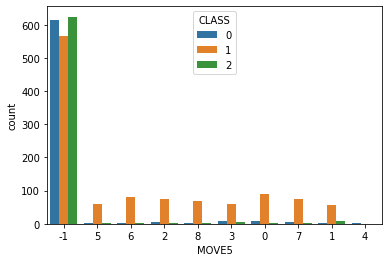

In [46]:
sns.countplot("MOVE5", hue="CLASS", data=df)
plt.show()

From the above data i could infer that the index 4 is the dominating value in MOVE1 and as we reach MOVE5 it leads us to majority draws.

## Train test split of data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state = 42)
classifier.fit(X_train,y_train)

C:\Users\Eshika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eshika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 62,  62,  84],
       [ 19, 300,  21],
       [ 42,  44,  97]], dtype=int64)

In [19]:
acc = (cm[0][0]+cm[1][1]+cm[2][2])/cm.sum()

In [20]:
acc

0.627906976744186

Logistic Regression doesn't predict that well on the data

### K-Nearest Neighbors Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[103,  31,  74],
       [ 20, 311,   9],
       [ 49,  24, 110]], dtype=int64)

In [25]:
acc = (cm[0][0]+cm[1][1]+cm[2][2])/cm.sum()
acc

0.7168262653898769

With an accuracy of arounf 71.5% knn gives us better results
### Kernel SVM Model

In [26]:
from sklearn.svm import SVC
clf_svm=SVC(kernel='rbf',random_state=42)
clf_svm.fit(X_train,y_train)

C:\Users\Eshika\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = clf_svm.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,  38,  70],
       [ 14, 313,  13],
       [ 52,  24, 107]], dtype=int64)

In [29]:
acc = (cm[0][0]+cm[1][1]+cm[2][2])/cm.sum()
acc

0.7113543091655267

Well even SVM gives us a good result but let's see if we can get better results
### Random Forest Classifier Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[118  36  54]
 [  3 329   8]
 [ 60  20 103]]


In [33]:
acc = (cm[0][0]+cm[1][1]+cm[2][2])/cm.sum()
acc

0.7523939808481532

And we have found our winner. Random Forest classifier gives us the highest accuracy of 75.2% with 15 n_estimators.